In [130]:
# Primo passo di Choromorph – Vettori separati (POI e Coesione)
from grids import build_square_grid
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Parametri
n_side = 10
alpha = 0.1  # forza attrazione POI
beta = 1  # forza coesione vicini

# Costruzione griglia e spigoli
grid, edges = build_square_grid(n_side)
segments = grid[edges]

# POI
pois = np.array([
    [0.80, 0.20],
    [0.75, 0.75],
    [0.60, 0.60]
])

# Calcolo vicini
N = grid.shape[0]
neighbors = [[] for _ in range(N)]
for a, b in edges:
    neighbors[a].append(b)
    neighbors[b].append(a)

# Inizializza vettori
v_poi = np.zeros_like(grid)
v_coh = np.zeros_like(grid)

In [131]:

# Calcolo vettori attrazione e coesione per ogni nodo
for i, n in enumerate(grid):
    # Attrazione verso POI più vicino
    diffs = pois - n
    dists = np.linalg.norm(diffs, axis=1)
    j = np.argmin(dists)
    d = dists[j]
    if d > 0:
        v_poi[i] = alpha * d * diffs[j] / d  # Normalizza verso il POI

    # Coesione con i vicini
    if neighbors[i]:
        centroid = grid[neighbors[i]].mean(axis=0)
        v_coh[i] = beta * (centroid - n)

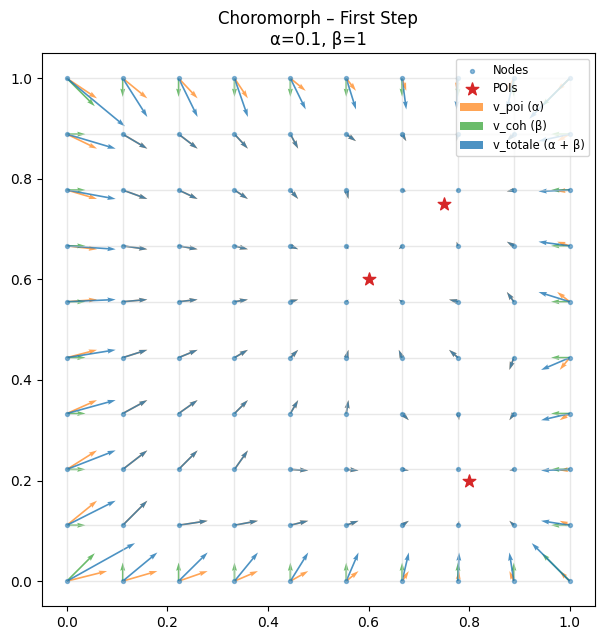

In [132]:

# Visualizzazione: Griglia + vettori separati
fig, ax = plt.subplots(figsize=(6.5, 6.5))

# Spigoli griglia
ax.add_collection(LineCollection(segments, colors='lightgray', linewidths=1, alpha=0.5))
# Nodi
ax.scatter(grid[:, 0], grid[:, 1], s=8, color='tab:blue', zorder=2, alpha=0.5, label='Nodes')
# POI
ax.scatter(pois[:, 0], pois[:, 1], s=90, marker='*', color='tab:red', zorder=3, label='POIs')

# Vettori attrazione POI (arancione)
ax.quiver(grid[:, 0], grid[:, 1], v_poi[:, 0], v_poi[:, 1],
          angles='xy', scale_units='xy', scale=1, alpha=0.7,
          color='tab:orange', width=0.003, label='v_poi (α)')

# Vettori coesione vicini (verde)
ax.quiver(grid[:, 0], grid[:, 1], v_coh[:, 0], v_coh[:, 1],
          angles='xy', scale_units='xy', scale=1, alpha=0.7,
          color='tab:green', width=0.003, label='v_coh (β)')

# vettori totali (blu)
v_total = v_poi + v_coh
ax.quiver(grid[:, 0], grid[:, 1], v_total[:, 0], v_total[:, 1],
          angles='xy', scale_units='xy', scale=1, alpha=0.8,
          color='tab:blue', width=0.003, label='v_totale (α + β)')

ax.set_title(f"Choromorph – First Step\nα={alpha}, β={beta}")
ax.set_aspect('equal')
ax.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

Create a gif to visualize the vectors in each step